In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

In [57]:
def RMSE_hfactory(y, y_pred):
    R_0 = np.sqrt(np.mean(y ** 2))
    RMSE_pred = np.sqrt(np.mean((y - y_pred) ** 2))
    return (R_0 - 0.8 * RMSE_pred)/R_0

In [101]:
train_data = pd.read_csv("completed_train_data.csv", sep=";")

In [102]:
cols = ['Month 1', 'Month 2', 'Month 3', 'Month 5', 'Month 6', 'Month 7', 'Month 9', 'Month 10', 'Month 11',
        'Month 13', 'Month 14', 'Month 15', 'Month 17', 'Month 18', 'Month 19',
        'Month 21', 'Month 22', 'Month 23', 'Month 25', 'Month 26', 'Month 27',
        'Month 29', 'Month 30', 'Month 31', 'Month 33', 'Month 34', 'Month 35', 'target']

In [103]:
for col in cols:
    train_data[col] = train_data[col].apply(lambda s: "".join(str(s).split())).astype(np.float32)

In [104]:
# remove train 35
train_data = train_data.drop(["Month 33"], axis = 1)

In [108]:
# Filter columns
train_data = train_data.drop(["Unnamed: 0", "index", "Country", "Site", "Operations", "Zone", "Cluster", "Reference proxy", "Product  Line proxy",
                               "Division proxy", "Customer Persona proxy", "Strategic Product Family proxy"], axis = 1)

In [109]:
train_data

,Date,id_product,Region,Product Life cycel status,target,Month 1,Month 2,Month 3,Month 5,Month 6,...,Month 23,Month 25,Month 26,Month 27,Month 29,Month 30,Month 31,Month 34,Month 35,GSCPI
0,jan-apr 2021,0,EAJP,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.030159
1,jan-apr 2021,1,EAJP,EOL,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.030159
2,jan-apr 2021,3,EAJP,EOL,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.030159
3,jan-apr 2021,4,EAJP,EOL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.030159
4,jan-apr 2021,5,EAJP,EOL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.030159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762965,sep-dec 2022,244851,CHINA,NaN,0.0,100.0,110.0,260.0,600.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111621
1762966,sep-dec 2022,244852,CHINA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,1.111621
1762967,sep-dec 2022,244853,CHINA,NaN,10.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,20.0,50.0,0.0,0.0,70.0,50.0,120.0,1.111621
1762968,sep-dec 2022,244855,CHINA,EOL,0.0,240.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111621


In [ ]:
# train_data.isna().sum()

# Linear regression

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
train_data.columns

Index(['Date', 'id_product', 'Region', 'Product Life cycel status', 'target',
       'Month 1', 'Month 2', 'Month 3', 'Month 5', 'Month 6', 'Month 7',
       'Month 9', 'Month 10', 'Month 11', 'Month 13', 'Month 14', 'Month 15',
       'Month 17', 'Month 18', 'Month 19', 'Month 21', 'Month 22', 'Month 23',
       'Month 25', 'Month 26', 'Month 27', 'Month 29', 'Month 30', 'Month 31',
       'Month 34', 'Month 35', 'GSCPI'],
      dtype='object')

In [120]:
normal_columns = ['Month 1', 'Month 2', 'Month 3', 'Month 5', 'Month 6', 'Month 7', 'Month 9', 'Month 10', 'Month 11', 'Month 13',
       'Month 14', 'Month 15', 'Month 17', 'Month 18', 'Month 19', 'Month 21', 'Month 22', 'Month 23', 'Month 25', 'Month 26', 'Month 27', 'Month 29',
       'Month 30', 'Month 31', 'Month 34', 'Month 35']

In [126]:
X_train, X_eval, y_train, y_eval = train_test_split(train_data[normal_columns],
                                                    train_data["target"],
                                                    random_state=44, test_size=0.1)

In [127]:
reg = LinearRegression().fit(X_train, y_train)

In [128]:
pred = reg.predict(X_eval[normal_columns])

In [129]:
np.mean((y_eval - pred) ** 2)

383627.34

In [130]:
RMSE_hfactory(y_eval, pred)

0.3648451414048761

# MLP

In [10]:
import tensorflow as tf

2023-12-03 05:49:18.617059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 05:49:18.703930: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 05:49:19.076579: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-03 05:49:19.076621: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

In [11]:
df = pd.get_dummies(train_data.fillna(-1))

In [19]:
df

,target,Month 1,Month 2,Month 3,Month 5,Month 6,Month 7,Month 9,Month 10,Month 11,...,Date_may-aug 2021,Date_may-aug 2022,Date_may-jul 2023,Date_sep-dec 2020,Date_sep-dec 2021,Date_sep-dec 2022,Region_CHINA,Region_EAJP,Region_EUROPE,Region_NAM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762965,0.0,100.0,110.0,260.0,600.0,10.0,100.0,170.0,60.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1762966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1762967,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1762968,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,350.0,...,0,0,0,0,0,1,1,0,0,0


In [12]:
X_train, X_eval, y_train, y_eval = train_test_split(df.drop("target", axis=1),
                                                    df["target"], random_state=42, test_size=0.2)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1),
])

2023-12-03 05:50:27.467413: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-03 05:50:27.467489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (danilo-Nitro-AN515-58): /proc/driver/nvidia/version does not exist
2023-12-03 05:50:27.469368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(optimizer="adam", loss='mse')

In [15]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=10, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)


Epoch 1/10
1378/1378 [==============================] - 2s 946us/step - loss: 412413.1562 - val_loss: 308364.8750
Epoch 2/10
1378/1378 [==============================] - 1s 787us/step - loss: 262003.0938 - val_loss: 358373.4688
Epoch 3/10
1378/1378 [==============================] - 1s 926us/step - loss: 240661.8438 - val_loss: 307081.8125
Epoch 4/10
1378/1378 [==============================] - 1s 742us/step - loss: 239762.7031 - val_loss: 321527.8125
Epoch 5/10
1378/1378 [==============================] - 1s 730us/step - loss: 233767.1875 - val_loss: 314476.0938
Epoch 6/10
1378/1378 [==============================] - 1s 914us/step - loss: 231110.2188 - val_loss: 330404.4375
Epoch 7/10
1378/1378 [==============================] - 1s 792us/step - loss: 228144.7656 - val_loss: 326197.5625
Epoch 8/10
1378/1378 [==============================] - 1s 922us/step - loss: 227367.7812 - val_loss: 331565.9688
Epoch 9/10
1378/1378 [==============================] - 1s 866us/step - loss: 227390.250

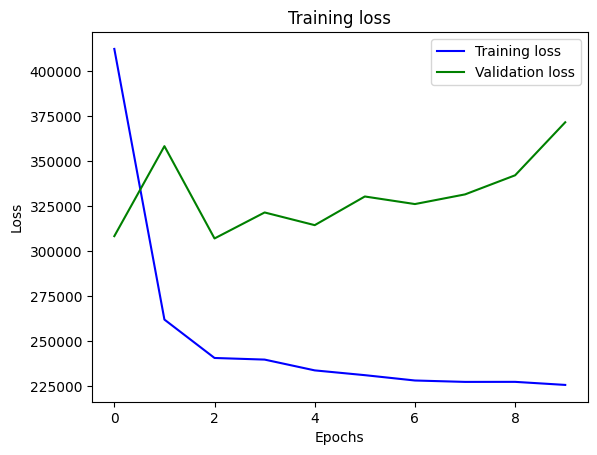

In [16]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
pred = model.predict(X_eval)
RMSE_hfactory(y_eval, pred[0])

11019/11019 [==============================] - 4s 333us/step


0.2000248957470795

In [18]:
pred = model.predict(X_train)
RMSE_hfactory(y_train, pred[0])

44075/44075 [==============================] - 14s 310us/step


0.2000883616715095

# Gradient boost

In [70]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_eval, y_train, y_eval = train_test_split(df.drop("target", axis=1),
                                                    df["target"],
                                                    random_state=42, test_size=0.2)

In [72]:
# params = {
#     "n_estimators": 500,
#     "max_depth": 4,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
# }

In [75]:
params = {
    "n_estimators": 50,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [76]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

: 

In [ ]:
mse = mean_squared_error(y_eval, reg.predict(X_eval))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

AttributeError: 'NoneType' object has no attribute 'tree_'

In [ ]:
pred = reg.predict(X_eval)

In [ ]:
RMSE_hfactory(y_eval, pred)

# Linear regression by date

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
selected_columns = {
    'jan-apr 2021': ['2021-01', '2021-02', '2021-03', '2021-05'],
    'jan-apr 2022': ['2022-01', '2022-02', '2022-03', '2022-05'],
    'jan-apr 2023': ['2023-01', '2023-02', '2023-03', '2023-06'],
    'may-aug 2021': ['2021-05', '2021-06', '2021-07', '2021-09'],
    'may-aug 2022': ['2022-05', '2022-06', '2022-07', '2022-09'],
    'may-jul 2023': ['2023-06', '2023-07'],
    'sep-dec 2020': ['2020-09', '2020-10', '2020-11', '2021-01'],
    'sep-dec 2021': ['2021-09', '2021-10', '2021-11', '2022-01'],
    'sep-dec 2022': ['2022-09', '2022-10', '2022-11', '2023-01']
}

In [161]:
reg_list = []
rmse_list = []
rmse_list_nonzero = []
rmse0_list = []
rmse_list_train = []
rmse_impacts = []
mus = []
sigmas = []

# mu, sigma = train_data[normal_columns].mean(axis=0), train_data[normal_columns].std(axis=0)

def normalize(X):
    mu, sigma = X[normal_columns].mean(axis=0), X[normal_columns].std(axis=0)
    X_norm = X.copy()
    X_norm.loc[:, normal_columns] = (X_norm[normal_columns] - mu) / sigma
    return X_norm

for i in range(9):
    date = train_data["Date"].unique()[i]
    df = train_data[train_data["Date"] == date]
    df = df.drop(["Date"], axis=1)
    # print(df.iloc[0])

    print(date)

    # sns.pairplot(df[['2020-09', '2023-07', "target"]])

    X_train, X_eval, y_train, y_eval = train_test_split(df.drop("target", axis=1),
                                                        df["target"],
                                                        random_state=44, test_size=0.1)
    
    # normal_columns = selected_columns[date]

    # print(normal_columns)

    normal_columns = ['Month 1', 'Month 2', 'Month 3', 'Month 5', 'Month 6', 'Month 7', 'Month 9', 'Month 10', 'Month 11', 'Month 13',
       'Month 14', 'Month 15', 'Month 17', 'Month 18', 'Month 19', 'Month 21', 'Month 22', 'Month 23', 'Month 25', 'Month 26', 'Month 27', 'Month 29',
       'Month 30', 'Month 31', 'Month 34', 'Month 35']
    
    # Standardize the data
    # normal_columns = ["Month 1", "Month 2", "Month 3"]
    mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
    X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
    X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

    # X_train = normalize(X_train)
    # X_eval = normalize(X_eval)
    
    # mus.append(mu)
    # sigmas.append(sigma)

    reg = LinearRegression().fit(X_train[normal_columns], y_train)

    pred = reg.predict(X_eval[normal_columns])

    print(pred)

    rmse_list.append(RMSE_hfactory(y_eval, pred))

    rmse_list_nonzero.append(RMSE_hfactory(y_eval, np.maximum(pred, 0)))

    rmse0_list.append(RMSE_hfactory(y_eval, 0 * y_eval))

    rmse_list_train.append(RMSE_hfactory(y_train, reg.predict(X_train[normal_columns])))

    rmse_impacts.append(np.sort(y_eval - pred))

    reg_list.append(reg)

jan-apr 2021
[ 0.52963257 12.762842    0.06712341 ...  0.49053192  0.57385254
  0.6675072 ]
jan-apr 2022
[ 9.894115 -9.553339  4.780287 ...  8.191703  3.898098  4.088358]
jan-apr 2023
[-2.323429  99.19191   -2.0756607 ... -2.2289543 86.66821   -1.278305 ]
may-aug 2021
[26.8881     1.4405136  1.5449371 ...  1.5512905  1.4405136  2.2225132]
may-aug 2022
[ 2.740736   3.029562   2.870285  ... 17.423347   2.8702831  3.110365 ]
may-jul 2023
[ 6.911145   6.0566044 19.266031  ...  6.0050325 13.675812   5.9599333]
sep-dec 2020
[-3.7581062  1.7444382 -5.896385  ... -2.8998985 -3.2038078 -3.381157 ]
sep-dec 2021
[4.6633415 2.625721  4.4008884 ... 1.4291553 2.2851276 2.4963531]
sep-dec 2022
[-229.58757     -1.6251698   -4.4668655 ...   -1.0921059   -1.6097679
   11.001284 ]


In [162]:
rmse_list_nonzero

[0.5888909213046164,
 0.3375465025275296,
 0.5829878877904909,
 0.42017752611883613,
 0.3300327946209057,
 0.3177087029779947,
 0.44714809332041594,
 0.3348625491950845,
 -0.5118959380572705]

In [160]:
rmse_list

[0.5865992017361409,
 0.33299248925099384,
 0.5828348697835505,
 0.2549160721012252,
 0.32792279255844575,
 0.31556900283923717,
 0.41275766249728674,
 0.33458434329362874,
 -0.5546967034513605]

In [140]:
np.sqrt(np.mean([r**2 for r in rmse_list]))

0.42905354076744256

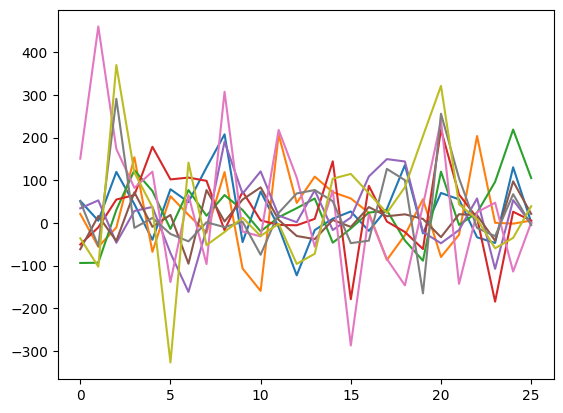

In [141]:
for r in reg_list:
    plt.plot(r.coef_)

# Predictions

In [55]:
from sklearn.linear_model import LinearRegression

In [4]:
train_data = pd.read_csv("completed_train_data.csv", sep=";")

cols = ['Month 1', 'Month 2', 'Month 3', 'Month 5', 'Month 6', 'Month 7', 'Month 9', 'Month 10', 'Month 11',
        'Month 13', 'Month 14', 'Month 15', 'Month 17', 'Month 18', 'Month 19',
        'Month 21', 'Month 22', 'Month 23', 'Month 25', 'Month 26', 'Month 27',
        'Month 29', 'Month 30', 'Month 31', 'Month 33', 'Month 34', 'Month 35', 'target']

for col in cols:
    train_data[col] = train_data[col].apply(lambda s: "".join(str(s).split())).astype(np.float32)

# remove train 35
train_data = train_data.drop(["Month 33"], axis = 1)

# Filter columns
train_data = train_data.drop(["Unnamed: 0", "index", "Country", "Site", "Operations", "Zone", "Cluster", "Reference proxy", "Product  Line proxy",
                               "Division proxy", "Customer Persona proxy", "Strategic Product Family proxy"], axis = 1)

In [151]:
df_test = pd.read_csv("datasets_hi4/X_test.csv", sep=";")

In [152]:
# test_idx = df_test["index"].values

In [153]:
df_test = df_test[["id_product", "index"]]

In [154]:
test_data = df_test.set_index(["id_product"]).join(train_data.drop_duplicates(subset=["id_product"]).set_index(["id_product"])).reset_index()

In [155]:
# Filter columns
test_data = test_data.drop(['id_product', 'Region', 'Product Life cycel status', "GSCPI"], axis = 1)

In [156]:
test_data

,index,Date,target,Month 1,Month 2,Month 3,Month 5,Month 6,Month 7,Month 9,...,Month 22,Month 23,Month 25,Month 26,Month 27,Month 29,Month 30,Month 31,Month 34,Month 35
0,1,jan-apr 2021,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1469143,jan-apr 2021,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,734572,jan-apr 2021,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,979430,jan-apr 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,244859,jan-apr 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440738,734569,jan-apr 2022,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440739,489712,jan-apr 2022,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440740,1224284,jan-apr 2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440741,979427,jan-apr 2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
reg_list = []
rmse_list = []

y = []

# mu, sigma = train_data[normal_columns].mean(axis=0), train_data[normal_columns].std(axis=0)

normal_columns = ['Month 1', 'Month 2', 'Month 3', 'Month 5', 'Month 6', 'Month 7', 'Month 9', 'Month 10', 'Month 11', 'Month 13',
       'Month 14', 'Month 15', 'Month 17', 'Month 18', 'Month 19', 'Month 21', 'Month 22', 'Month 23', 'Month 25', 'Month 26', 'Month 27', 'Month 29',
       'Month 30', 'Month 31', 'Month 34', 'Month 35']

def normalize(X):
    mu, sigma = X[normal_columns].mean(axis=0), X[normal_columns].std(axis=0)
    X_norm = X.copy()
    X_norm.loc[:, normal_columns] = (X_norm[normal_columns] - mu) / sigma
    return X_norm

for i in range(9):
    date = train_data["Date"].unique()[i]
    df = train_data[train_data["Date"] == date]
    df = df.drop(["Date"], axis=1)
    # print(df.iloc[0])

    X_train, X_eval, y_train, y_eval = train_test_split(df.drop("target", axis=1),
                                                        df["target"],
                                                        random_state=44, test_size=0.1)
    
    # normal_columns = selected_columns[date]
    
    # Standardize the data
    # normal_columns = ["Month 1", "Month 2", "Month 3"]
    mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
    X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
    X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

    # X_train = normalize(X_train)
    # X_eval = normalize(X_eval)
    
    # mus.append(mu)
    # sigmas.append(sigma)

    reg = LinearRegression().fit(X_train[normal_columns], y_train)

    # predict on test data
    if date in test_data["Date"].unique():
        df = test_data[test_data["Date"] == date].copy()
        df[normal_columns] = (df[normal_columns] - mu) / sigma
        # print(df.shape, reg.predict(df[normal_columns]).shape)
        df.loc[:, "Month 4"] = np.maximum(0, reg.predict(df[normal_columns]))
        y.append(df[["index", "Month 4"]])

In [172]:
tb = pd.concat(y).set_index("index")

In [173]:
tb

,Month 4
index,
1,0.546844
1469143,0.546844
734572,0.546844
979431,0.955429
1714002,0.955429
...,...
2177201,0.000000
1197773,0.000000
708059,0.000000


In [174]:
tb.sort_values("Month 4")

,Month 4
index,
463202,0.000000
407568,0.000000
1355470,0.000000
1386901,0.000000
897187,0.000000
...,...
2183334,95519.828125
735479,128322.687500
980336,128322.687500


In [179]:
tb.to_csv("prediction.csv", sep=";")

In [4]:
df_test0 = pd.read_csv("./data/X_test.csv", sep=";")

In [6]:
df_test0[df_test0["index"] == 1836605]

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3
118936,1836605,122606,EUROPE,SE,SE_DC_Orebro,Europe Operations,Nordic & Baltics,Sweden,reference-7898,Product Line-4,Division-3,Customer Segmentation-3,Strategic Product Family-9,NaN,jan-apr 2023,0,0,0


In [171]:
df_test0[df_test0["index"] == 1]

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3
23512,1,1,EAJP,AU,AU_DC_Sydney,International Operations,Pacific,Australia,reference-2,Product Line-1,Division-1,Customer Segmentation-2,Strategic Product Family-1,EOL,sep-dec 2020,0,0,0


In [121]:
test_data_normalized = test_data.copy()

In [122]:
test_data_normalized[normal_columns] = (test_data_normalized[normal_columns] - mu) / sigma

In [125]:
for i in range(9):
    date = train_data["Date"].unique()[i]
    print(date)
    if date in test_data_normalized["Date"].unique():
        print("...")
        df = test_data_normalized[test_data_normalized["Date"] == date][normal_columns]
        print(df.shape)
        pred = reg_list.predict(df)
        print(pred.shape)

jan-apr 2021
...
(313009, 26)
(313009,)
jan-apr 2022
...
(93933, 26)
(93933,)
jan-apr 2023
...
(25377, 26)
(25377,)
may-aug 2021
...
(6577, 26)
(6577,)
may-aug 2022
...
(1390, 26)
(1390,)
may-jul 2023
...
(368, 26)
(368,)
sep-dec 2020
...
(89, 26)
(89,)
sep-dec 2021
sep-dec 2022


In [110]:
pred

array([-13.418203  , -13.418203  , -13.418203  , -13.418203  ,
       -13.418203  , -13.418203  ,  -1.5958557 ,  -1.5958557 ,
        -1.5958576 ,  -1.5958576 ,  -1.5958576 ,  -1.5958576 ,
        -1.9971237 ,  -1.9971237 ,  -1.9971237 ,  -1.9971237 ,
        -1.9971237 ,  -1.9971237 ,  -1.9971237 ,  -1.1582241 ,
        -1.1582241 ,  -1.1582241 ,  -1.1582241 ,  -1.1582241 ,
        -1.1582241 ,  -1.1582241 ,  -0.8150997 ,  -0.8150997 ,
        -0.8150997 ,  -0.8150997 ,  -0.8150997 ,  -0.8150997 ,
        -0.7484226 ,  -0.7484226 ,  -0.7484226 ,  -0.7484226 ,
        -0.7484226 ,  -0.7484226 ,  -1.6251717 ,  -1.6251717 ,
        -1.6251717 ,  -1.6251717 ,  -1.6251717 ,  -1.6251717 ,
        -0.85793877,  -0.85793877,  -0.85793877,  -0.85793877,
        -0.85793877,  -0.85793877,   0.828928  ,   0.828928  ,
         0.828928  ,   0.828928  ,   0.828928  ,   0.828928  ,
         0.828928  ,  -1.6251717 ,  -1.6251717 ,  -1.6251717 ,
        -1.6251717 ,  -1.6251717 ,  -1.6251717 ,  -1.62

In [61]:
reg_list[0].predict()

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]